In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('customer_reviews_b10.csv')
df.head(4)

,review_id,customer_id,product_id,review_text,rating,purchase_category,purchase_amount
0,R00001,C00001,P0001,"Shipping took too long, bad customer service.",1,Books,380.67
1,R00002,C00002,P0002,"Broke within a week, very disappointed.",1,Toys,268.58
2,R00003,C00003,P0003,"Average quality, nothing special.",3,Books,249.11
3,R00004,C00004,P0004,"Broke within a week, very disappointed.",2,Books,218.26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          9000 non-null   object 
 1   customer_id        9000 non-null   object 
 2   product_id         9000 non-null   object 
 3   review_text        9000 non-null   object 
 4   rating             9000 non-null   int64  
 5   purchase_category  9000 non-null   object 
 6   purchase_amount    9000 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 492.3+ KB


In [5]:
df.isnull().sum()

review_id            0
customer_id          0
product_id           0
review_text          0
rating               0
purchase_category    0
purchase_amount      0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Cleaning customer Review column using Regular Expressions and Word Lemmatizer

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\St
[nltk_data]     Mary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\St
[nltk_data]     Mary\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# nltk.download()

In [11]:
## Initializing Stop words and Lemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [12]:
## Define function for Text Cleaning using Regular Expressions and WordNetLemmatizer

def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z]", ' ', text.lower()) # Remove numbers  and Punctuations
    words = text.split() # split words into separate units
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned_review'] = df['review_text'].apply(preprocess_text)

In [13]:
df.head(6)

,review_id,customer_id,product_id,review_text,rating,purchase_category,purchase_amount,cleaned_review
0,R00001,C00001,P0001,"Shipping took too long, bad customer service.",1,Books,380.67,shipping took long bad customer service
1,R00002,C00002,P0002,"Broke within a week, very disappointed.",1,Toys,268.58,broke within week disappointed
2,R00003,C00003,P0003,"Average quality, nothing special.",3,Books,249.11,average quality nothing special
3,R00004,C00004,P0004,"Broke within a week, very disappointed.",2,Books,218.26,broke within week disappointed
4,R00005,C00005,P0005,"Worst purchase ever, do not recommend.",2,Toys,283.41,worst purchase ever recommend
5,R00006,C00006,P0006,"Terrible experience, never buying again.",2,Electronics,346.42,terrible experience never buying


<Axes: title={'center': 'Distibution of Customer Ratings'}, xlabel='rating'>

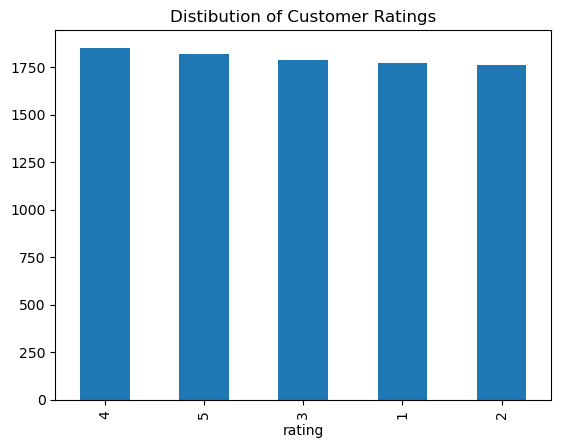

In [14]:
df['rating'].value_counts().plot(kind='bar', title='Distibution of Customer Ratings')

In [15]:
df['rating'].value_counts()

rating
4    1853
5    1823
3    1788
1    1775
2    1761
Name: count, dtype: int64

### Clustering with K_Means

Concept: Clustering groups similar reviews together. We'll use TF-IDF(Term Frequency-Inverse Document Frequency)

### Vectorization

Vectorize a Text (convert the text or words into numbers) Vectorizing is used in NLP to map words or phrases from a dataset or column to a corresponding vector of numbers which is then used to find word predictions or similarities.


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=9000)
x = vectorizer.fit_transform(df['cleaned_review'])

In [18]:
## Apply K-Means clustering

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(x)

#Preview Clusters
df[['cleaned_review', 'Cluster']].head(10)

,cleaned_review,Cluster
0,shipping took long bad customer service,2
1,broke within week disappointed,3
2,average quality nothing special,2
3,broke within week disappointed,3
4,worst purchase ever recommend,0
5,terrible experience never buying,1
6,worst purchase ever recommend,0
7,great product work perfectly,4
8,worth money poor quality,2
9,great product work perfectly,4


<Axes: title={'center': 'Distribution of Clusters'}, xlabel='Cluster'>

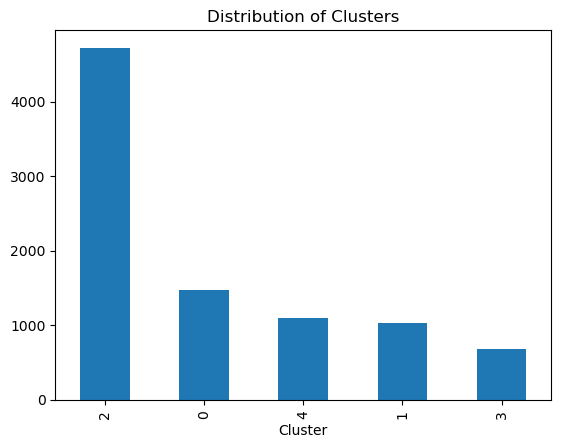

In [19]:
# Visualize the Clusters 

df['Cluster'].value_counts().plot(kind='bar', title="Distribution of Clusters")

### Sentiments Analysis - VADER

VADER - Valence Aware Dictionary and Sentiment Reasoner
- Is a tool used basically to figure out if a piece of text is expressing positive, negative or neutral emotions

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\St
[nltk_data]     Mary\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
# Initialize Sentiment Analyzer

sid = SentimentIntensityAnalyzer()

# Apply Sentiment Analysis
df['Sentiment_Score'] = df['cleaned_review'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [23]:
# Preview Analysis

df[['cleaned_review','Sentiment_Score', 'Sentiment_Label']].head(15)

,cleaned_review,Sentiment_Score,Sentiment_Label
0,shipping took long bad customer service,-0.5423,Negative
1,broke within week disappointed,-0.7096,Negative
2,average quality nothing special,-0.3089,Negative
3,broke within week disappointed,-0.7096,Negative
4,worst purchase ever recommend,-0.3818,Negative
5,terrible experience never buying,-0.4767,Negative
6,worst purchase ever recommend,-0.3818,Negative
7,great product work perfectly,0.8519,Positive
8,worth money poor quality,-0.2960,Negative
9,great product work perfectly,0.8519,Positive


In [24]:
df['Sentiment_Label'].value_counts()

Sentiment_Label
Negative    3896
Positive    3646
Neutral     1458
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Sentiments'}, xlabel='Sentiment_Label'>

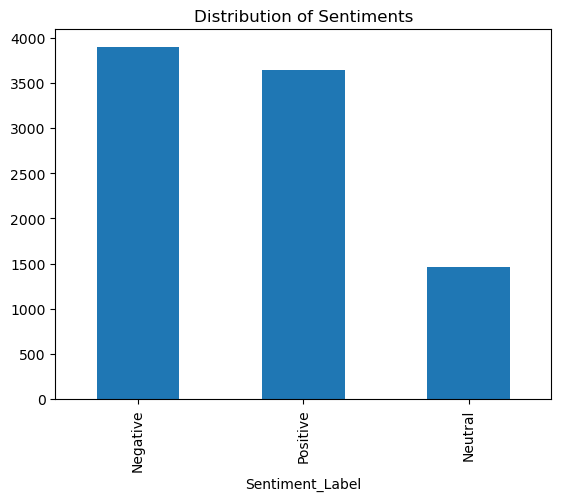

In [25]:
df['Sentiment_Label'].value_counts().plot(kind='bar', title='Distribution of Sentiments')

In [26]:
df['Sentiment_Label'].value_counts()

Sentiment_Label
Negative    3896
Positive    3646
Neutral     1458
Name: count, dtype: int64

## Sentiment Analysis Using TexBlob

In [28]:
# !pip install textblob

In [29]:
from textblob import TextBlob

def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity


df['textblob_sentiment'] = df['cleaned_review'].apply(get_textblob_sentiment)

In [30]:
# Generate Sentiment Categories for both Vader and TextBlob

def categorize_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['vader_category'] = df['Sentiment_Score'].apply(categorize_sentiment)
df['textblob_category'] = df['textblob_sentiment'].apply(categorize_sentiment)

In [31]:
print(df['vader_category'].value_counts())

vader_category
Negative    3896
Positive    3646
Neutral     1458
Name: count, dtype: int64


In [32]:
print(df['textblob_category'].value_counts())

textblob_category
Positive    4012
Negative    2829
Neutral     2159
Name: count, dtype: int64


In [33]:
## Use Word Cloud to show the Frequency of texts in the Cleaned review

In [34]:
# !pip install wordcloud

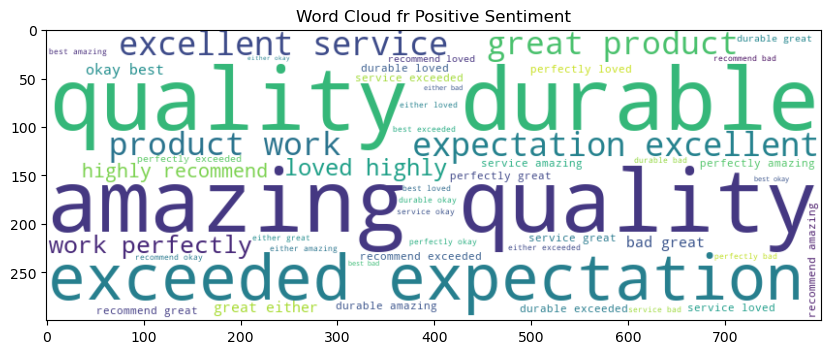

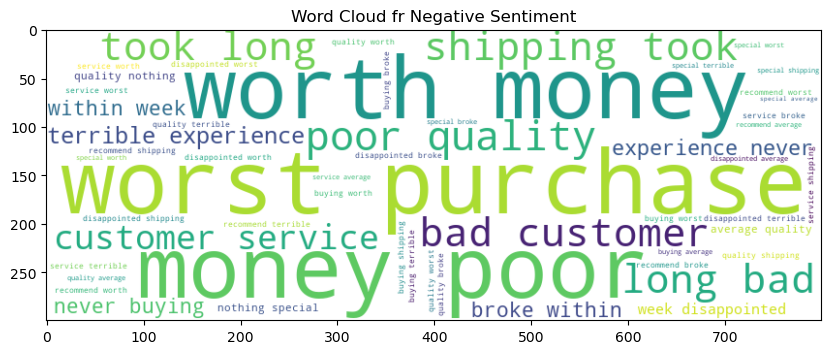

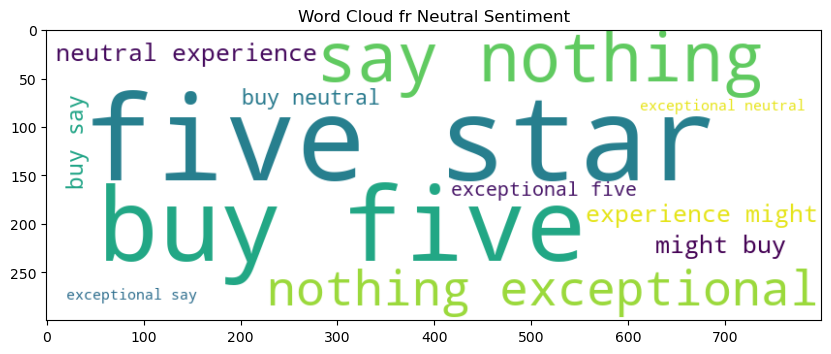

In [35]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment category
def generate_word_clouds(sentiment):
    text = " ".join(df[df['Sentiment_Label'] == sentiment]['cleaned_review'])
    wordcloud = WordCloud(width=800, height=300, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud fr {sentiment} Sentiment")
    plt.show()


# Generate word cloud for Positive, Negative and Neutral Sentiments

for sentiment in ['Positive','Negative','Neutral']:
    generate_word_clouds(sentiment)


# Generate  Silhouette Score

Silhouette Score - A score that measures the accuracy of clustering done by K-Means

- Accurate K-Means Clustering should be above 0.6

In [37]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, df['Cluster'])
print(score)

0.3825557969265732


In [43]:
kmean = KMeans(n_clusters=10, random_state=42)
df['Clusters'] = kmean.fit_predict(x)

df[['cleaned_review', 'Clusters']]

,cleaned_review,Clusters
0,shipping took long bad customer service,2
1,broke within week disappointed,6
2,average quality nothing special,7
3,broke within week disappointed,6
4,worst purchase ever recommend,0
...,...,...
8995,five star would buy,4
8996,amazing quality durable,7
8997,worth money poor quality,1
8998,worst purchase ever recommend,0


<Axes: xlabel='Clusters'>

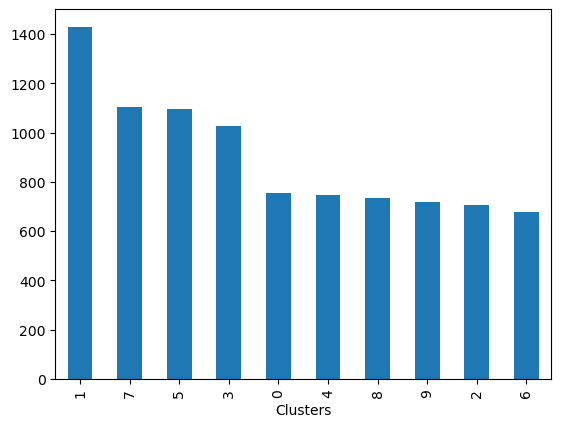

In [45]:
df['Clusters'].value_counts().plot(kind='bar')

In [53]:
df['Sentiment_Score'] = df['cleaned_review'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

df[['cleaned_review','Sentiment_Score' ,'Sentiment_Label']].head(10)

,cleaned_review,Sentiment_Score,Sentiment_Label
0,shipping took long bad customer service,-0.5423,Negative
1,broke within week disappointed,-0.7096,Negative
2,average quality nothing special,-0.3089,Negative
3,broke within week disappointed,-0.7096,Negative
4,worst purchase ever recommend,-0.3818,Negative
5,terrible experience never buying,-0.4767,Negative
6,worst purchase ever recommend,-0.3818,Negative
7,great product work perfectly,0.8519,Positive
8,worth money poor quality,-0.2960,Negative
9,great product work perfectly,0.8519,Positive


<Axes: xlabel='Sentiment_Label'>

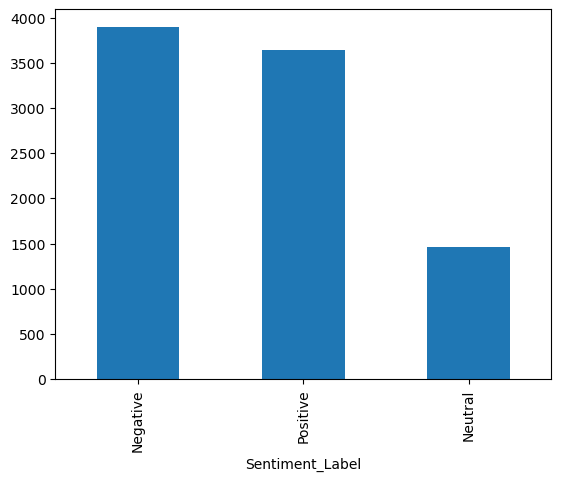

In [57]:
df['Sentiment_Label'].value_counts().plot(kind='bar')

# Use Supervised Learning Models to predict Customer rating

In [62]:
product_avg_rating = df.groupby('purchase_category')['rating'].mean().rename('purchase_avg_rating')

df = df.join(product_avg_rating, on='purchase_category')

df.head()

,review_id,customer_id,product_id,review_text,rating,purchase_category,purchase_amount,cleaned_review,Cluster,Sentiment_Score,Sentiment_Label,textblob_sentiment,vader_category,textblob_category,Clusters,purchase_avg_rating
0,R00001,C00001,P0001,"Shipping took too long, bad customer service.",1,Books,380.67,shipping took long bad customer service,2,-0.5423,Negative,-0.375000,Negative,Negative,2,2.985429
1,R00002,C00002,P0002,"Broke within a week, very disappointed.",1,Toys,268.58,broke within week disappointed,3,-0.7096,Negative,-0.750000,Negative,Negative,6,2.977045
2,R00003,C00003,P0003,"Average quality, nothing special.",3,Books,249.11,average quality nothing special,2,-0.3089,Negative,0.103571,Negative,Positive,7,2.985429
3,R00004,C00004,P0004,"Broke within a week, very disappointed.",2,Books,218.26,broke within week disappointed,3,-0.7096,Negative,-0.750000,Negative,Negative,6,2.985429
4,R00005,C00005,P0005,"Worst purchase ever, do not recommend.",2,Toys,283.41,worst purchase ever recommend,0,-0.3818,Negative,-1.000000,Negative,Negative,0,2.977045


In [68]:
# Seperate The data into features and target

x = df[['Sentiment_Score', 'purchase_avg_rating']]
y = df['rating']

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
xtrain.shape

(7200, 2)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression()


In [98]:
log_reg.fit(xtrain, ytrain)
y_pred = log_reg.predict(xtest)

In [100]:
print('Train Score: ', log_reg.score(xtrain, ytrain))
print('Test Score: ', accuracy_score(ytest, y_pred))

Train Score:  0.48527777777777775
Test Score:  0.44666666666666666


In [102]:
from sklearn.neighbors import KNeighborsClassifier


for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    knn_pred = knn.predict(xtest)
    print('Score', k, '=', accuracy_score(ytest, knn_pred))

Score 1 = 0.54
Score 2 = 0.5438888888888889
Score 3 = 0.5494444444444444
Score 4 = 0.5377777777777778
Score 5 = 0.5422222222222223
Score 6 = 0.5416666666666666
Score 7 = 0.5411111111111111
Score 8 = 0.5427777777777778
Score 9 = 0.54
Score 10 = 0.5427777777777778
Score 11 = 0.5394444444444444
Score 12 = 0.5388888888888889
Score 13 = 0.5344444444444445
Score 14 = 0.5455555555555556


In [108]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)
print('Train Score: ', knn.score(xtrain, ytrain))
print('Test Score: ', accuracy_score(ytest, knn_pred))

Train Score:  0.5638888888888889
Test Score:  0.5455555555555556


In [121]:
print(classification_report(ytest, knn_pred))

              precision    recall  f1-score   support

           1       0.51      0.64      0.57       361
           2       0.48      0.34      0.40       343
           3       0.73      0.92      0.81       337
           4       0.51      0.71      0.59       388
           5       0.38      0.13      0.19       371

    accuracy                           0.55      1800
   macro avg       0.52      0.55      0.51      1800
weighted avg       0.52      0.55      0.51      1800



In [110]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=5, min_samples_split=5)

dt.fit(xtrain, ytrain)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5)

In [118]:
dt_pred = dt.predict(xtest)

print("Train Score:", dt.score(xtrain, ytrain))
print('Test Score:',accuracy_score(ytest, dt_pred))

Train Score: 0.5844444444444444
Test Score: 0.5488888888888889


In [116]:
print(classification_report(ytest, dt_pred))

              precision    recall  f1-score   support

           1       0.52      0.54      0.53       361
           2       0.50      0.48      0.49       343
           3       0.69      1.00      0.82       337
           4       0.49      0.44      0.46       388
           5       0.47      0.33      0.38       371

    accuracy                           0.55      1800
   macro avg       0.53      0.56      0.54      1800
weighted avg       0.53      0.55      0.53      1800



In [151]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(xtrain, ytrain)


RandomForestClassifier(random_state=42)

In [146]:
rfc_pred = rfc.predict(xtest)

print('Train Score: ', rfc.score(xtrain, ytrain))
print('Test Score: ', accuracy_score(ytest, y_pred))

Train Score:  0.5841666666666666
Test Score:  0.44666666666666666


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(xtrain, ytrain)

LinearRegression()

In [142]:
lr_pred = lr.predict(xtest)

print('Train Score: ', lr.score(xtrain, ytrain))
print('Test Score: ', r2_score(ytest, y_pred))

Train Score:  0.6818515998646514
Test Score:  0.6373732808161683


In [159]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

rfr.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [161]:
rfr_pred = rfr.predict(xtest)

r2_score(ytest, rfc_pred)

0.7172277317978266